In [1]:
import pandas as pd
import numpy as np
import re
import json
import requests
import seaborn as sns
%matplotlib inline
import ast
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


In [2]:
sucesso = pd.read_csv("C:/Users/marim/Documents/IRONHACK/PROJETO FINAL/SUCESSO.csv")

In [3]:
rentabilidade = pd.read_csv("C:/Users/marim/Documents/IRONHACK/PROJETO FINAL/RENTABILIDADE.csv")

In [4]:
diretores = pd.read_csv("C:/Users/marim/Documents/IRONHACK/PROJETO FINAL/DIRETORES.csv")

In [5]:
escritores = pd.read_csv("C:/Users/marim/Documents/IRONHACK/PROJETO FINAL/ESCRITORES.csv")

In [6]:
estrelas  = pd.read_csv("C:/Users/marim/Documents/IRONHACK/PROJETO FINAL/ESTRELAS.csv")

In [7]:
#keywords - BOG

In [8]:
sucesso['Production'].fillna("No Information",inplace=True)

In [9]:
sucesso = sucesso.drop(columns = ['Unnamed: 0'])

In [10]:
sucesso = sucesso.sort_values("IMDB_Rating", ascending = False)

In [11]:
sucesso.head(10)

,Movie_Title,Release_Date,Year,Genres,Budget,Worldwide_Gross,Production,Directors,Writers,Stars,Keywords,Runtime,IMDB_Rating,Num Votes,Title_Type
436,The Lion King,1994-07-01,1994,"['Animation', ' Adventure', ' Drama', ' Family...",45000000.0,9.685118e+08,"['Walt Disney Pictures', ' Walt Disney Feature...","['Rob Minkoff', ' Roger Allers']","['Irene Mecchi', 'Jonathan Roberts']","['Matthew Broderick', 'Jeremy Irons', 'James E...","['africa', 'king', 'lion', 'unnecessary guilt'...",88.0,8.5,870762.0,movie
537,Toy Story 3,2010-06-18,2010,"['Animation', ' Adventure', ' Comedy', ' Famil...",200000000.0,1.066970e+09,"['Walt Disney Pictures', ' Pixar Animation Stu...",['Lee Unkrich'],"['John Lasseter', 'Andrew Stanton']","['Tom Hanks', 'Tim Allen', 'Joan Cusack']","['toy', 'college', 'escape', 'day care', 'evil...",103.0,8.3,706582.0,movie
535,Toy Story,1996-01-12,1995,"['Animation', ' Adventure', ' Comedy', ' Famil...",30000000.0,4.065941e+08,"['Pixar Animation Studios', ' Walt Disney Pict...",['John Lasseter'],"['John Lasseter', 'Pete Docter']","['Tom Hanks', 'Tim Allen', 'Don Rickles']","['toy', 'rivalry', 'cowboy', 'cgi animation', ...",81.0,8.3,822025.0,movie
550,Up,2009-09-04,2009,"['Animation', ' Adventure', ' Comedy', ' Family']",175000000.0,7.350991e+08,"['Pixar Animation Studios', ' Walt Disney Pict...","['Pete Docter', ' Bob Peterson']","['Pete Docter', 'Bob Peterson']","['Edward Asner', 'Jordan Nagai', 'John Ratzenb...","['south america', 'talking dog', 'lifted by he...",96.0,8.2,868676.0,movie
109,Finding Nemo,2003-07-04,2003,"['Animation', ' Adventure', ' Comedy', ' Family']",94000000.0,9.690233e+08,"['Pixar Animation Studios', ' Walt Disney Pict...","['Andrew Stanton', ' Lee Unkrich']","['Andrew Stanton', 'Andrew Stanton']","['Albert Brooks', 'Ellen DeGeneres', 'Alexande...","['pufferfish', 'shark', 'great barrier reef', ...",100.0,8.1,889055.0,movie
293,Ratatouille,2007-07-06,2007,"['Animation', ' Adventure', ' Comedy', ' Drama...",150000000.0,6.237228e+08,"['Walt Disney Pictures', ' Pixar Animation Stu...","['Brad Bird', ' Jan Pinkava']","['Brad Bird', 'Jan Pinkava']","['Brad Garrett', 'Lou Romano', 'Patton Oswalt']","['rat', 'chef', 'ratatouille', 'soup', 'hair']",111.0,8.0,595050.0,movie
230,"Monsters, Inc.",2001-11-14,2001,"['Animation', ' Adventure', ' Comedy', ' Famil...",115000000.0,6.323166e+08,"['Pixar Animation Studios', ' Walt Disney Pict...","['Pete Docter', ' David Silverman', ' Lee Unkr...","['Pete Docter', 'Jill Culton']","['Billy Crystal', 'John Goodman', 'Mary Gibbs']","['original story', 'monster', 'interspecies fr...",92.0,8.0,759528.0,movie
420,The Incredibles,2004-12-10,2004,"['Animation', ' Action', ' Adventure', ' Family']",92000000.0,6.316067e+08,"['Pixar Animation Studios', ' Walt Disney Pict...",['Brad Bird'],No Information,"['Craig T', 'Samuel L', 'Holly Hunter']","['superhero family', 'superhero', 'strong fema...",115.0,8.0,617890.0,movie
19,Aladdin,1993-07-03,1992,"['Animation', ' Adventure', ' Comedy', ' Famil...",28000000.0,5.040502e+08,"['Walt Disney Pictures', ' Body Penis Producti...","['Ron Clements', ' John Musker']","['Ron Clements', 'John Musker']","['Scott Weinger', 'Robin Williams', 'Linda Lar...","['arab', 'genie', 'genie character', 'princess...",90.0,8.0,337270.0,movie
457,The Nightmare Before Christmas,1994-10-28,1993,"['Animation', ' Family', ' Fantasy', ' Musical']",18000000.0,8.817097e+07,"['Touchstone Pictures', ' Skellington Producti...",['Henry Selick'],"['Tim Burton', 'Michael McDowell']","['Danny Elfman', 'Chris Sarandon', 'Catherine O']","['christmas movie', 'christmas', 'halloween', ...",76.0,8.0,274273.0,movie


In [12]:
rentabilidade = rentabilidade.drop(columns = ['Unnamed: 0'])

In [13]:
rentabilidade = rentabilidade.sort_values("Worldwide_Gross", ascending = False)

rentabilidade.head(10)

,Movie_Title,Release_Date,Year,Genres,Budget,Worldwide_Gross,Production,Directors,Writers,Stars,Keywords,Runtime,IMDB_Rating,Num Votes,Title_Type
241,Toy Story 3,2010-06-18,2010,"['Animation', ' Adventure', ' Comedy', ' Famil...",200000000.0,1066969703,"['Walt Disney Pictures', ' Pixar Animation Stu...",['Lee Unkrich'],"['John Lasseter', 'Andrew Stanton']","['Tom Hanks', 'Tim Allen', 'Joan Cusack']","['toy', 'college', 'escape', 'day care', 'evil...",103.0,8.3,706582.0,movie
128,Pirates of the Caribbean: Dead Man's Chest,2006-07-21,2006,"['Action', ' Adventure', ' Fantasy']",225000000.0,1066179725,"['Walt Disney Pictures', ' Jerry Bruckheimer F...",['Gore Verbinski'],"['Ted Elliott', 'Terry Rossio']","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","['heart', ""liar's dice"", 'monster', 'giant squ...",151.0,7.3,622992.0,movie
129,Pirates of the Caribbean: On Stranger Tides,2011-05-20,2011,"['Action', ' Adventure', ' Fantasy']",250000000.0,1045713802,"['Walt Disney Pictures', ' Jerry Bruckheimer F...",['Rob Marshall'],"['Ted Elliott', 'Terry Rossio']","['Johnny Depp', 'Penélope Cruz', 'Ian McShane']","['pirate', 'captain', 'blackbeard', 'soldier',...",NaN,6.6,455681.0,movie
10,Alice in Wonderland,2010-04-23,2010,"['Adventure', ' Family', ' Fantasy']",200000000.0,1025467110,"['Walt Disney Pictures', ' Roth Films', ' Team...",['Tim Burton'],"['Linda Woolverton', 'Lewis Carroll']","['Mia Wasikowska', 'Johnny Depp', 'Helena Bonh...","['alice in wonderland', 'shrinking potion', 'c...",108.0,6.4,364736.0,movie
53,Finding Nemo,2003-07-04,2003,"['Animation', ' Adventure', ' Comedy', ' Family']",94000000.0,969023261,"['Pixar Animation Studios', ' Walt Disney Pict...","['Andrew Stanton', ' Lee Unkrich']","['Andrew Stanton', 'Andrew Stanton']","['Albert Brooks', 'Ellen DeGeneres', 'Alexande...","['pufferfish', 'shark', 'great barrier reef', ...",100.0,8.1,889055.0,movie
191,The Lion King,1994-07-01,1994,"['Animation', ' Adventure', ' Drama', ' Family...",45000000.0,968511805,"['Walt Disney Pictures', ' Walt Disney Feature...","['Rob Minkoff', ' Roger Allers']","['Irene Mecchi', 'Jonathan Roberts']","['Matthew Broderick', 'Jeremy Irons', 'James E...","['africa', 'king', 'lion', 'unnecessary guilt'...",88.0,8.5,870762.0,movie
127,Pirates of the Caribbean: At World's End,2007-05-25,2007,"['Action', ' Adventure', ' Fantasy']",300000000.0,960996492,"['Walt Disney Pictures', ' Jerry Bruckheimer F...",['Gore Verbinski'],"['Ted Elliott', 'Terry Rossio']","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","['mass hanging', 'pirate', 'goddess', 'treache...",169.0,7.1,565956.0,movie
173,"The Chronicles of Narnia: The Lion, the Witch ...",2005-12-09,2005,"['Adventure', ' Family', ' Fantasy']",180000000.0,745013115,"['Walt Disney Pictures', ' Walden Media']",['Andrew Adamson'],"['Ann Peacock', 'Andrew Adamson']","['Tilda Swinton', 'Georgie Henley', 'William M...","['witch', 'santa claus character', 'the white ...",143.0,6.9,345924.0,movie
103,Monsters University,2013-06-21,2013,"['Animation', ' Adventure', ' Comedy', ' Famil...",200000000.0,743559607,"['Walt Disney Pictures', ' Pixar Animation Stu...",['Dan Scanlon'],"['Dan Scanlon', 'Daniel Gerson']","['Billy Crystal', 'John Goodman', 'Steve Busce...","['monster', 'university', 'fraternity', 'cheat...",104.0,7.3,299610.0,movie
247,Up,2009-09-04,2009,"['Animation', ' Adventure', ' Comedy', ' Family']",175000000.0,735099082,"['Pixar Animation Studios', ' Walt Disney Pict...","['Pete Docter', ' Bob Peterson']","['Pete Docter', 'Bob Peterson']","['Edward Asner', 'Jordan Nagai', 'John Ratzenb...","['south america', 'talking dog', 'lifted by he...",96.0,8.2,868676.0,movie


In [14]:
#diretores = diretores.drop(columns = ['Unnamed: 0'])

diretores.corr()[['IMDB_Rating']].sort_values('IMDB_Rating', ascending = False)

,IMDB_Rating
IMDB_Rating,1.000000
Lee Unkrich,0.158567
John Musker,0.147970
Wilfred Jackson,0.141945
Ron Clements,0.139609
John Lasseter,0.137455
Pete Docter,0.136704
Brad Bird,0.129325
Hamilton Luske,0.126792
David Hand,0.119360


In [15]:
#escritores = escritores.drop(columns = ['Unnamed: 0'])

escritores.head()

,Unnamed: 0,,A Situation,AJ Carothers,Adam Rifkin,Ahmet Zappa,Air Bud,Alan Caillou,Alan Sacks,Alan Shapiro,...,Will Stanton,William Corbin,William Cottrell,William Hudson,William Nack,William Peed,William R,William Tunberg,Winston Hibler,IMDB_Rating
0,893,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.5
1,750,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.7
2,870,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.9
3,97,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.2
4,798,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.2


In [16]:
escritores.corr()[['IMDB_Rating']].sort_values('IMDB_Rating', ascending = False)

,IMDB_Rating
IMDB_Rating,1.000000
Pete Docter,0.193761
John Lasseter,0.158669
Ron Clements,0.139609
Andrew Stanton,0.136235
Larry Clemmons,0.134926
John Musker,0.131006
Irene Mecchi,0.117405
Jonathan Roberts,0.117405
Jerry Juhl,0.107296


In [17]:
#estrelas = estrelas.drop(columns = ['Unnamed: 0'])

estrelas.head()

,Unnamed: 0,,AJ Michalka,Aaron Schwartz,Adam Alexi,Adam Beach,Adam DiMarco,Adam Garcia,Adam Hicks,Adam LaVorgna,...,Wood Harris,Yonas Zergaw,Yvette Mimieux,Zac Efron,Zach Braff,Zach Galifianakis,Zachary Ittimangnaq,Zachary Levi,Zooey Deschanel,IMDB_Rating
0,893,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.5
1,750,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.7
2,870,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.9
3,97,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.2
4,798,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.2


In [18]:
estrelas.corr()[['IMDB_Rating']].sort_values('IMDB_Rating', ascending = False)

,IMDB_Rating
IMDB_Rating,1.000000
Tom Hanks,0.183302
James Earl,0.117405
Jeremy Irons,0.117405
Sebastian Cabot,0.110312
Orlando Bloom,0.110312
Don Rickles,0.106981
Billy Crystal,0.103497
Jordan Nagai,0.101769
John Ratzenberger,0.101769


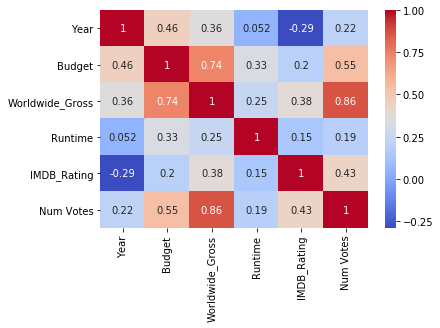

In [19]:
grafico1 = sns.heatmap(sucesso.corr(),cmap='coolwarm',annot=True)

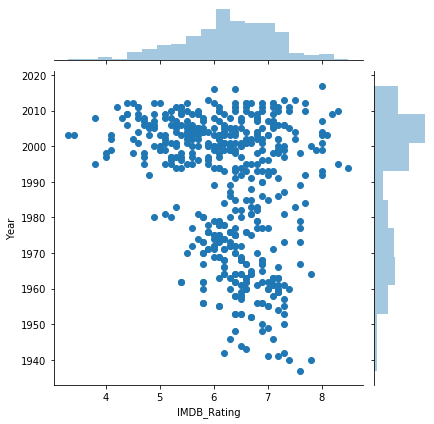

In [20]:
grafico2 = sns.jointplot(x='IMDB_Rating',y='Year',data=sucesso,kind='scatter')


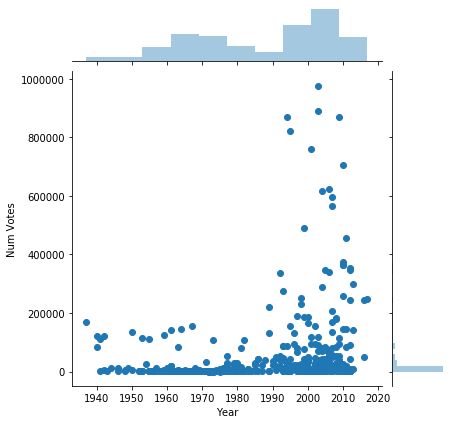

In [21]:
grafico = sns.jointplot(x='Year',y='Num Votes',data=sucesso,kind='scatter')


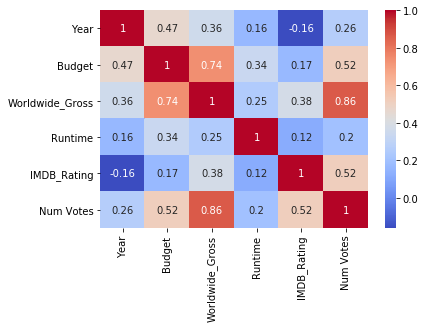

In [22]:
grafico3 = sns.heatmap(rentabilidade.corr(),cmap='coolwarm',annot=True)

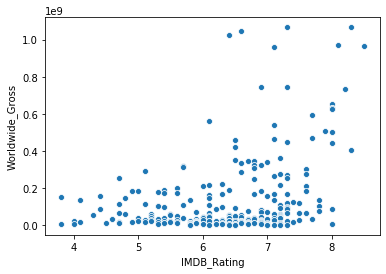

In [23]:
grafico4 = sns.scatterplot(x='IMDB_Rating',y='Worldwide_Gross',data=rentabilidade)

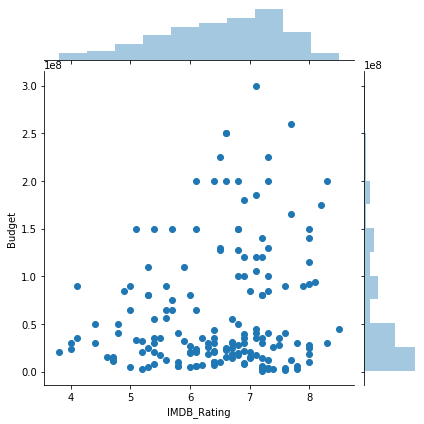

In [24]:
grafico3 = sns.jointplot(x='IMDB_Rating',y='Budget',data=rentabilidade, kind='scatter')

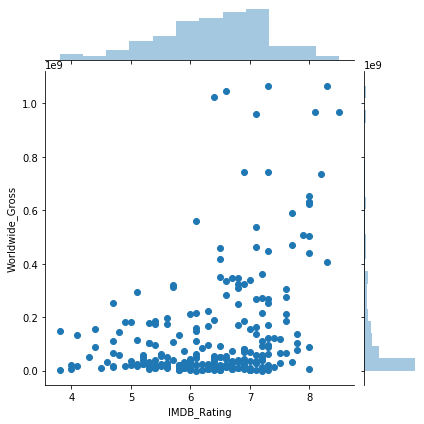

In [25]:
grafico3 = sns.jointplot(x='IMDB_Rating',y='Worldwide_Gross',data=rentabilidade, kind='scatter')

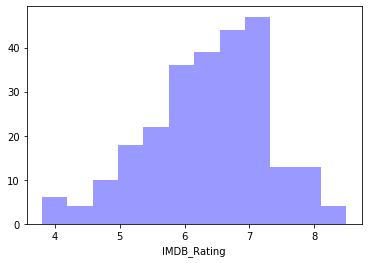

In [26]:
sns.distplot(rentabilidade['IMDB_Rating'], color="blue", kde=False)

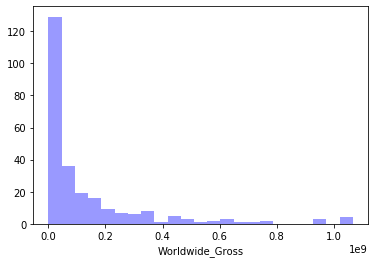

In [27]:
sns.distplot(rentabilidade['Worldwide_Gross'], color="blue", kde=False)

In [28]:
sucesso["Genres"] = [re.findall('\s*\w*-*\s*\w*', x) for x in sucesso["Genres"]]

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

data_genero = pd.DataFrame(mlb.fit_transform(sucesso['Genres']),columns=mlb.classes_, index=sucesso.index)

In [30]:
data_genero = data_genero.join(sucesso["IMDB_Rating"])

In [31]:
data_genero.head()

,,,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,...,Adventure,Animation,Biography,Comedy,Documentary,Drama,Family,Fantasy,Western,IMDB_Rating
436,1,1,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,8.5
537,1,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,8.3
535,1,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,8.3
550,1,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,8.2
109,1,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,8.1


In [32]:
data_genero.columns

Index(['', ' ', ' Action', ' Adventure', ' Animation', ' Biography', ' Comedy',
       ' Crime', ' Drama', ' Family', ' Fantasy', ' History', ' Horror',
       ' Music', ' Musical', ' Mystery', ' Romance', ' Sci-Fi', ' Short',
       ' Sport', ' Thriller', ' War', ' Western', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Western', 'IMDB_Rating'],
      dtype='object')

In [33]:
data_genero = data_genero.drop(columns = ['', ' '])


In [34]:
data_genero.corr()[['IMDB_Rating']].sort_values('IMDB_Rating', ascending = False)

,IMDB_Rating
IMDB_Rating,1.000000
Animation,0.359344
Adventure,0.216730
Musical,0.155626
Fantasy,0.146126
Biography,0.143182
Drama,0.101902
History,0.100920
War,0.034017
Fantasy,0.027403


In [35]:
sucesso['Production'] = [re.findall('\s*\w*-*\s*\w*', x) for x in sucesso['Production']]

In [36]:
sucesso.dtypes

Movie_Title         object
Release_Date        object
Year                 int64
Genres              object
Budget             float64
Worldwide_Gross    float64
Production          object
Directors           object
Writers             object
Stars               object
Keywords            object
Runtime            float64
IMDB_Rating        float64
Num Votes          float64
Title_Type          object
dtype: object

In [37]:
sucesso['Keywords'] = sucesso['Keywords'].str.split(',')

In [38]:
type(sucesso['Keywords'][0])

list

In [39]:
tags = []

for x in sucesso['Keywords']:
    for tag in x:
        value = re.findall('\w+', tag)
        for v in value:
            tags.append(v) 

In [40]:
print(tags)

['africa', 'king', 'lion', 'unnecessary', 'guilt', 'scar', 'toy', 'college', 'escape', 'day', 'care', 'evil', 'teddy', 'bear', 'toy', 'rivalry', 'cowboy', 'cgi', 'animation', 'claw', 'crane', 'south', 'america', 'talking', 'dog', 'lifted', 'by', 'helium', 'balloon', 'human', 'dog', 'relationship', 'child', 'in', 'jeopardy', 'pufferfish', 'shark', 'great', 'barrier', 'reef', 'short', 'term', 'memory', 'loss', 'protective', 'father', 'rat', 'chef', 'ratatouille', 'soup', 'hair', 'original', 'story', 'monster', 'interspecies', 'friendship', 'heartfelt', 'abominable', 'snowman', 'character', 'superhero', 'family', 'superhero', 'strong', 'female', 'character', 'non', 'comic', 'book', 'superhero', 'secret', 'identity', 'arab', 'genie', 'genie', 'character', 'princess', 'cave', 'christmas', 'movie', 'christmas', 'halloween', 'gothic', 'stop', 'motion', 'animation', 'france', 'rose', 'based', 'on', 'fairy', 'tale', 'castle', 'title', 'appears', 'in', 'song', 'road', 'trip', 'lawn', 'mower', 'i

In [41]:
tags_semdup = list(dict.fromkeys(tags))
print(tags_semdup)

['africa', 'king', 'lion', 'unnecessary', 'guilt', 'scar', 'toy', 'college', 'escape', 'day', 'care', 'evil', 'teddy', 'bear', 'rivalry', 'cowboy', 'cgi', 'animation', 'claw', 'crane', 'south', 'america', 'talking', 'dog', 'lifted', 'by', 'helium', 'balloon', 'human', 'relationship', 'child', 'in', 'jeopardy', 'pufferfish', 'shark', 'great', 'barrier', 'reef', 'short', 'term', 'memory', 'loss', 'protective', 'father', 'rat', 'chef', 'ratatouille', 'soup', 'hair', 'original', 'story', 'monster', 'interspecies', 'friendship', 'heartfelt', 'abominable', 'snowman', 'character', 'superhero', 'family', 'strong', 'female', 'non', 'comic', 'book', 'secret', 'identity', 'arab', 'genie', 'princess', 'cave', 'christmas', 'movie', 'halloween', 'gothic', 'stop', 'motion', 'france', 'rose', 'based', 'on', 'fairy', 'tale', 'castle', 'title', 'appears', 'song', 'road', 'trip', 'lawn', 'mower', 'iowa', 'elderly', 'protagonist', 'pirate', 'curse', 'undead', 'governor', 'capuchin', 'monkey', 'comes', 'to

In [42]:
def count_freq(list_str):
    token = [t for each_line in list_str for t in each_line.split(" ")]
    count_token = [token.count(i) for i in list(set(token))]
    term_freq_dict = dict(zip(set(token),count_token))
    return(term_freq_dict)

In [43]:
frequencia_tags = count_freq(tags)

In [44]:
tagfreq = pd.DataFrame.from_dict(frequencia_tags, orient = "index", columns = ["Frequência"]).sort_values("Frequência", ascending = False)

tagfreq.head(10)

,Frequência
character,123
title,90
movie,73
dog,69
in,61
relationship,53
animal,49
disney,48
as,41
on,38


In [45]:
diretores.sum().sort_values(ascending = False)

Unnamed: 0             338955.0
IMDB_Rating              2817.6
Robert Stevenson           18.0
Vincent McEveety           12.0
Norman Tokar               12.0
 Hamilton Luske            11.0
Clyde Geronimi             11.0
 Wilfred Jackson           10.0
Paul Hoen                  10.0
Robert Vince                9.0
Stuart Gillard              9.0
 Jack Kinney                8.0
Duwayne Dunham              8.0
Greg Beeman                 6.0
Kenny Ortega                6.0
 Bill Roberts               6.0
 John Musker                6.0
Robert Butler               5.0
Wolfgang Reitherman         5.0
Jon Turteltaub              5.0
James Neilson               5.0
Steve Boyum                 5.0
 James Algar                5.0
Ron Clements                5.0
Kevin Lima                  4.0
Ken Annakin                 4.0
 Norman Ferguson            4.0
Gary Nelson                 4.0
Lev L. Spiro                3.0
Samuel Armstrong            3.0
                         ...   
Joe Nuss

In [46]:
escritores_rent.head()

NameError: name 'escritores_rent' is not defined

In [ ]:
estrelas_rent.head()

In [47]:
diretores_rent = pd.read_csv("C:/Users/marim/Documents/IRONHACK/PROJETO FINAL/diretores_rent.csv")

In [48]:
diretores_rent = diretores_rent.drop(columns = ['Unnamed: 0'])

In [49]:
escritores_rent = escritores.join(rentabilidade['Worldwide_Gross'])

In [50]:
escritores_rent = escritores_rent.drop(columns = ['Unnamed: 0'])

In [51]:
estrelas_rent = estrelas.join(rentabilidade['Worldwide_Gross'])

In [52]:
estrelas_rent = estrelas_rent.drop(columns = ['Unnamed: 0'])

In [53]:
genero_rent = pd.read_csv("C:/Users/marim/Documents/IRONHACK/PROJETO FINAL/genero_rent.csv")

In [54]:
genero_rent = genero_rent.drop(columns = ['Unnamed: 0'])

In [55]:
diretores_rent.corr()[['Worldwide_Gross']].sort_values('Worldwide_Gross', ascending = False)

,Worldwide_Gross
Worldwide_Gross,1.000000
Gore Verbinski,0.384910
Lee Unkrich,0.287861
Lee Unkrich,0.272102
Rob Marshall,0.265872
Roger Allers,0.243247
Pete Docter,0.226406
Andrew Stanton,0.203993
Brad Bird,0.203132
Andrew Adamson,0.184309


In [56]:
escritores_rent.corr()[['Worldwide_Gross']].sort_values('Worldwide_Gross', ascending = True)

,Worldwide_Gross
Andrew Stanton,-0.064727
John Lasseter,-0.060748
Arthur Alsberg,-0.059100
Cormac Wibberley,-0.056916
Louis Pelletier,-0.056507
Paul Bernbaum,-0.055801
Robert L,-0.054413
Joseph L,-0.054314
Mark Andrews,-0.053633
Bob Roth,-0.053508


In [64]:
estrelas_rent.corr()[['Worldwide_Gross']].sort_values('Worldwide_Gross', ascending = False)

,Worldwide_Gross
Worldwide_Gross,1.000000
Sara Paxton,0.272102
Lucas Grabeel,0.272102
Sigourney Weaver,0.271870
Jon Voight,0.271870
Cuba Gooding,0.265872
Judi Dench,0.265872
Jennifer Tilly,0.265872
,0.259939
Adam Wylie,0.243396


In [58]:
genero_rent.corr()[['Worldwide_Gross']].sort_values('Worldwide_Gross', ascending = False)

,Worldwide_Gross
Worldwide_Gross,1.000000
Adventure,0.412801
Animation,0.327363
Fantasy,0.254301
Action,0.158882
Comedy,0.146546
Action,0.063168
Musical,0.059853
Romance,-0.000268
Thriller,-0.001860


In [59]:
#pip install wordcloud


In [60]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



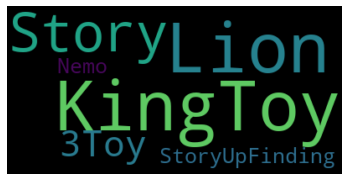

In [61]:
# Start with one review:
text = ['The Lion King', 'Toy Story 3', 'Toy Story', 'Up', 'Finding Nemo']

text1 = ' '

for i in text:
    text1 += i

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

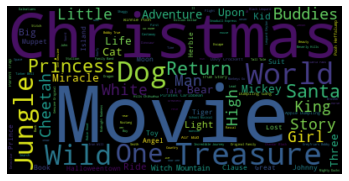

In [62]:
wordcloud2 = WordCloud().generate(' '.join(sucesso["Movie_Title"]))

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()